<a href="https://colab.research.google.com/github/gabrielestacio/projetoLAIS_fase2_ia/blob/master/Documenta%C3%A7%C3%A3o_do_Projeto_Fetal_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**FETAL HEALTH - DOCUMENTAÇÃO**


---





Olá! Essa é a documentação do projeto Fetal Health, desenvolvido por Gabriel Estácio de S. Passos para o processo seletivo de bolsistas para o projeto "Sífilis, não!", do LAIS.


---



# **Partes da Documentação**


---


[1.   Apresentação do problema](https://colab.research.google.com/drive/1yyZYx8dbw5oPXg2G3gr8Ky3XzItKscfN#scrollTo=SkQsNphyBROJ&line=6&uniqifier=1)

[2.   Metodologia e abordagem](https://colab.research.google.com/drive/1yyZYx8dbw5oPXg2G3gr8Ky3XzItKscfN#scrollTo=gjLNV1fiBLFM&line=4&uniqifier=1)

[3.   Códigos e tutorial do projeto](https://colab.research.google.com/drive/1yyZYx8dbw5oPXg2G3gr8Ky3XzItKscfN#scrollTo=JO1MpvBF1Jt5&line=1&uniqifier=1ttps://)




# **Apresentação do Problema**


---



O problema consiste na análise de dados do exame cardiotocogramas (CTGs) que tem por objetivo medir a frequência cardíaca fetal (FCF), movimentos fetais, contrações uterinas e outros parâmetros, a fim de prevenir a mortalidade infantil e materna. O conjunto de dados contém 2.126 registros, que foram classificados por três obstetricistas especialistas em 3 classes: Normal (1), Suspeito (2) e Patológico (3). Sendo assim, o objetivo é criar um modelo multiclasse que classifique os dados nestes três estados de saúde fetal.

# **Metodologia e Abordagem**


---



Para resolver este problema, utilizaremos a linguagem de programação **Python**, na versão 3.8, com as bibliotecas **pandas**, **numpy**, **matplotlib**, **seaborn** e **scikit-learn**.

A dinâmica escolhida para este projeto foi a regressão logística, pois esta dinâmica trabalha retornando valores entre 0 e 1, o que é bastante útil no nosso problema, onde devemos retornar valores que determinem a possibilidade de um feto estar saudável, ter suspeita de uma patologia, ou efetivamente ter uma patologia. A ideia é que, a partir dos dados de entrada, pela regressão logística, o modelo vai procurar definir uma função que determine a probabilidade do feto estar inserido em uma das três classes.

Além disso, essa dinâmica é a mais comum quando trabalhamos com modelos cujas classes são discretas.

# **Códigos e Tutorial do Projeto**


---
Todos esses códigos também estão disponíveis no [repositório do GitHub](https://github.com/gabrielestacio/projetoLAIS_fase2_ia/blob/master/C%C3%B3digos/main.py//).



**1: PRÉ-PROCESSAMENTO**

Importação, análise e preparação dos dados para o treinamento e teste do modelo.


---



Inicialmente, iremos fazer o **import** das bibliotecas e módulos que usaremos nesse projeto. Serão usados métodos das bibliotecas ***pandas***, ***numpy***, ***scikit-lear (sklearn)***, ***matplotlib*** e ***seaborn***.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

O próximo passo é importar o dataset fornecido para o projeto, por meio da função ***read_csv()*** da biblioteca ***pandas***:

In [2]:
df = pd.read_csv("fetal_health.csv")

Pra que entendamos melhor do que se trata o nosso dataset, podemos fazer algumas análises sobre ele. Iniciaremos verificando algumas características do conjunto.

In [ ]:
# imprimindo as 5 primeiras linhas do dataframe
df.head()

In [ ]:
# imprimindo o formato do dataframe (linhas x colunas)
df.shape

In [ ]:
# imprimindo os tipos de dados contidos em cada coluna
df.dtypes

In [ ]:
# listando o nome de todas as colunas (atributos)
list(df.columns)

Agora, iremos analisar se este dataset possui dados faltantes. Para isso, juntaremos as funções ***isna()***, que verifica se um elemento é nulo, e ***any()***, que retorna 'True' ou 'False' pra se a condição da função anterior foi satisfeita em cada coluna. As duas pertencem a biblioteca ***pandas***.

In [16]:
# retornando se alguma das colunas tem dados ausentes
df.isna().any()

baseline value                                            False
accelerations                                             False
fetal_movement                                            False
uterine_contractions                                      False
light_decelerations                                       False
severe_decelerations                                      False
prolongued_decelerations                                  False
abnormal_short_term_variability                           False
mean_value_of_short_term_variability                      False
percentage_of_time_with_abnormal_long_term_variability    False
mean_value_of_long_term_variability                       False
histogram_width                                           False
histogram_min                                             False
histogram_max                                             False
histogram_number_of_peaks                                 False
histogram_number_of_zeroes              

Ótimo! Nosso dataframe está todo completo e não possui dados ausentes. Sendo assim, podemos passar para o próximo passo, que é verificar se temos dados duplicados através da junção das funções ***duplicated()*** e ***sum()***, da biblioteca ***pandas***.

In [8]:
# retornando a quantidade de dados duplicados que temos em todo nosso dataset
df.duplicated().sum()

13


Descobrimos que temos alguns dados duplicados, então precisamos tratá-los. Para isso, usaremos a função ***drop_duplicates()***:

In [10]:
# eliminando dados duplicados
df.drop_duplicates(inplace=True)

E agora, se repetirmos o código anterior, veremos que esses dados duplicados se foram.

In [11]:
# retornando a quantidade de dados duplicados que temos em todo nosso dataset
print(df.duplicated().sum())

0


Como vimos na [célula de checagem de tipos](https://colab.research.google.com/drive/1yyZYx8dbw5oPXg2G3gr8Ky3XzItKscfN#scrollTo=K-_kceMDjRx-&line=2&uniqifier=1), temos apenas váriaveis numéricas, então não precisamos fazer conversões de categóricas para numéricas, concluindo a limpeza dos dados. Por segurança, exportaremos esse dataframe já limpo, para não precisarmos repetir todo o processo numa necessidade futura. Faremos isso usando a função ***to_csv()*** da biblioteca ***pandas***.

In [19]:
# exportando o dataframe manipulado
df.to_csv("fetal_health_manipulated.csv", index=False)

A próxima etapa do pré-processamento é verificar se temos variáveis muito correlacionadas e que podem ser unidas. Verificaremos isso fazendo um mapa de calor, usando os seguintes métodos:


*   **pandas**: ***corr()***

*   **numpy**: ***zeros_like()*** e ***triu_indices_from()***

*   **seaborn**: ***set_context()***, ***heatmap()***, ***set_xticklabels()***, ***get_xticklabels()***, ***set_yticklabels()*** e ***get_yticklabels()***

*   **matplotlib**: ***figure()***

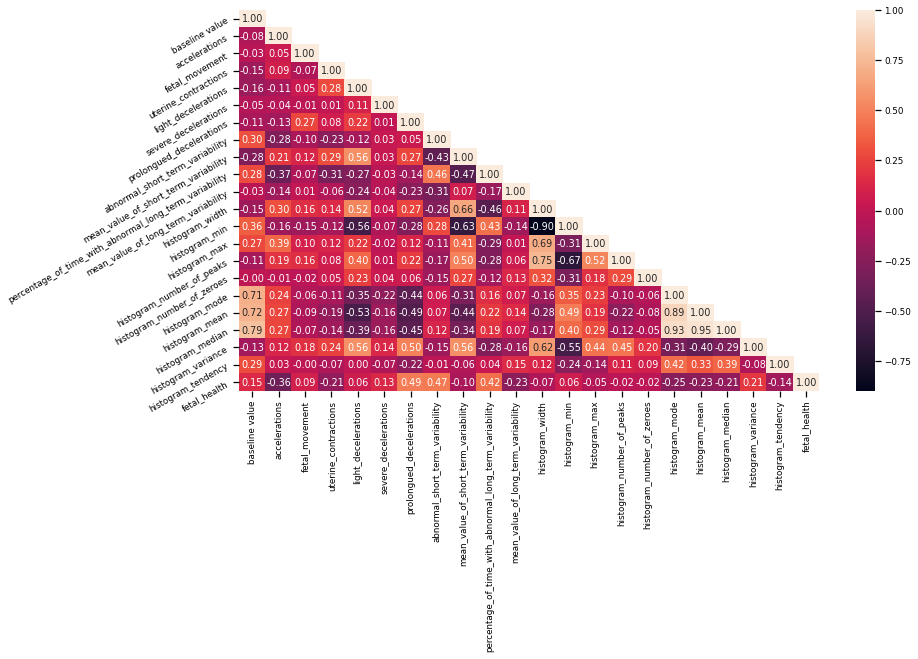

In [23]:
# criando um mapa de calor que mostra a correlação entre as variáveis

corr = df.corr()
sns.set_context("notebook", font_scale=0.8, rc={"lines.linewidth": 4.0})
plt.figure(figsize=(13, 7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

"""
Lembrando que a diagonal principal representa a correlação de uma variável
consigo mesma, por isso todas as posições têm valor '1.00'
"""

Como podemos perceber pelo gráfico, excetuando-se as variáveis que caracterizam o histograma, nenhum par de váriaveis tem correlação muito próxima de 1 para que possamos uni-las em uma única variável.

Nosso próximo passo é determinar nossos conjuntos de entradas e de respostas. Utilizaremos a função ***drop()*** da biblioteca ***pandas*** para criar o conjunto de entradas. Apesar de ser uma função usada para apagar dados, nós não a utilizaremos pra modificar nosso dataframe. Na prática, iremos armazená-lo em uma outra variável, excluindo apenas nossa coluna de respostas, sem mudar o que está armazenado em '**df**'.

In [24]:
"""
Armazenando as colunas que serão usadas de entrada no nosso modelo, ou seja,
todas as colunas, menos a de resposta
"""
X = df.drop("fetal_health", axis=1)

Para o conjunto de respostas, armazenaremos em uma nova variável a coluna que "removemos" na linha anterior

In [25]:
y = df.fetal_health

A penúltima etapa do pré-processamento é dividir nossos conjuntos em outros conjuntos de treinamento e de teste, através da função ***train_test_split()***, da biblioteca ***scikit-learn***. Dividiremos os conjuntos *X* e *y* na seguinte proporção: 70% para treino do modelo e 30% para teste.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Antes de finalizarmos o pré-processamento, podemos notar que o valor mínimo e o valor máximo de algumas váriaveis de entrada são bem distintos:

In [27]:
# exibindo as 20 primeiras linhas de cada coluna
df.head(20)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.000,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.000,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.000,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.000,0.010,0.009,0.0,0.002,26.0,5.9,0.0,0.0,150.0,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.000,0.013,0.008,0.0,0.003,29.0,6.3,0.0,0.0,150.0,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.000,0.000,0.000,0.0,0.000,83.0,0.5,6.0,15.6,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.000,0.002,0.000,0.0,0.000,84.0,0.5,5.0,13.6,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.000,0.003,0.000,0.0,0.000,86.0,0.3,6.0,10.6,68.0,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


Váriaveis como **fetal_movement**, **abnormal_short_term_variability** e **mean_value_of_short_term_variability** tem valores bem distintos. Pra resolvermos isso, vamos normalizar nossos dados utilizando as funções ***StandardScaler()***, ***fit_transform()*** e ***transform()*** da biblioteca ***scikit-learn***.

In [31]:
# normalizando os dados
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Após esse passo, terminamos o pré-processamento. Agora, iremos iniciar o treinamento do nosso modelo.

**2: TREINAMENTO E TESTE DO MODELO**

Aplicação da dinâmica de treinamento para aprimoramento do modelo.


---



Para o treinamento do nosso modelo, utilizaremos a função ***ravel()*** da biblioteca ***numpy***, e as funções ***LogisticRegression()***, ***fit()*** e ***predict()***, da biblioteca ***scikit-learn***.

In [32]:
# fazendo o treinamento por regressão logística e armazenando o resultado das predições em uma nova variável
logit = LogisticRegression(verbose=1, max_iter=1000)
logit.fit(X_train, np.ravel(y_train, order='C'))
y_pred = logit.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Finalizado o treinamento do nosso modelo, podemos prosseguir para a última etapa: a apresentação das métricas e verificação da eficácia do modelo.

**3: MÉTRICAS**

Apresentação das estatísticas relacionadas ao treinamento e avaliação do modelo.

Iniciaremos verificando a acurácia do nosso modelo através da função ***accuracy_score()***, do módulo ***metrics*** da biblioteca ***scikit-learn***.

In [33]:
# imprimindo o índice de acurácia do modelo
print(f'Acurácia:\n{metrics.accuracy_score(y_test, y_pred)}')

Acurácia:
0.9132492113564669


Nosso modelo obteve uma acurácia de, aproximadamente, 91.3%. Vamos verificar como isso se traduziu nas classes 1 (normal), 2 (suspeito) e 3 (patológico), através de um relatório de classificação. Para isso, utilizaremos a função ***classification_report()***, também do módulo ***metrics*** da biblioteca ***scikit-learn***.

In [35]:
# imprimindo o relatório de classificação do modelo, que apresenta estatísticas do comportamento do modelo
print(f"Relatório de classificação:\n{metrics.classification_report(y_test, y_pred, target_names=['1', '2', '3'])}")

Relatório de classificação:
              precision    recall  f1-score   support

           1       0.94      0.97      0.96       497
           2       0.77      0.64      0.70        90
           3       0.81      0.81      0.81        47

    accuracy                           0.91       634
   macro avg       0.84      0.81      0.82       634
weighted avg       0.91      0.91      0.91       634



Podemos observar, através das colunas 'precision' e 'recall' que, para as classes 1 e 3, o modelo se comportou bem e teve um alto índice de acertos, contribuindo para o f1_score alto. Já a classe 2, não teve um desempenho muito bom, principalmente na parte do recall, ou seja, classificando muitos dados que pertenciam a classe 2 como pertencentes a outra classe. Isso fica claro se criarmos uma matriz de confusão. Para isso, utilizaremos a função ***confusion_matrix()***, também do módulo ***metrics*** da biblioteca ***scikit-learn***.

In [36]:
"""
Imprimindo matriz de confusão. Apresenta, em formato de matriz o número de
acertos e erros para cada classe, indicando a qual classe o modelo atribuiu
o dado erronamente e quantas vezes ele repetiu esse erro.
"""
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f'Matriz de confusão:\n{cnf_matrix}')

Matriz de confusão:
[[483  11   3]
 [ 26  58   6]
 [  3   6  38]]


**4: UM PROBLEMA NÃO IMPLEMENTADO**

Desbalanceamento das classes e porque é mais vantajoso mantê-las assim.

A matriz de confusão mostra que mais de um terço dos dados da segunda classe foi para atribuído erroneamente a uma outra classe que não a 2. Isto, aliado com a coluna support do relatório de classificação (que mostra quantos dados de cada classe foram processados) indica um desbalanceamento das classes. Podemos verificar isso pela função ***value_counts()*** da biblioteca ***pandas***:

In [37]:
df['fetal_health'].value_counts()

1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64

Como podemos ver, há uma quantidade bem maior de dados na classe 1 do que nas classes 2 e 3.

Existem duas formas de resolvermos esse desbalanceamento:


1.   **Oversampling**: replicamos, aleatoriamente, os dados das classes minoritárias até igualarmos a quantidade de dados da classe majoritária;
2.   **Undersampling**: descartamos, aleatoriamente, os dados das classes majoritárias até igualarmos a quantidade de dados da classe minoritária.



Porém, como a classe majoritária 1 é muito maior que a classe minoritária 3, os dados seriam de 3 seriam replicados quase dez vezes para compensar a diferença para a classe 1. Isso poderia acarretar em *overfitting*, fazendo com que nosso modelo se adaptasse muito bem ao processo de treinamento, mas respondesse muito mal à possíveis novas entradas. Por conta disso, o processo de *oversampling* foi descartado.

O mesmo princípio se aplica ao *undersampling*: como a classe minoritária 3 é muito menor que a classe majoritária 1, descartaríamos muitos dados e teríamos conjuntos de treinamento e testes muito pequenos, com menos de 200 dados, o que prejudicaria o aprendizado do modelo. Por isso, o *undersampling* também foi descartado.

Outro ponto que influencia na opção de manter a quantidade de entradas de cada classe desbalanceada é o fato da classe prejudicada ser a classe 2 (suspeito), onde ainda não há uma confirmação final sobre o estado de saúde do feto.

Sendo assim, completamos o nosso projeto e atingimos a resolução do problema com um modelo com uma boa avaliação.